Arboles de Decisión

In [1]:
# Se carga al entorno de trabajo las librerias necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# Se establecen los nombres de las columnas de los datos

wine = pd.read_csv('wine.data', names=['Tipo','Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280_OD315','Proline'])

In [3]:
# Se muestran los datos anexados

wine

,Tipo,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# Se muestra el total de registros y columnas de la información anexada con anterioridad

wine.shape

(178, 14)

In [5]:
# Se muestran los datos estadísticos 

wine.describe()

,Tipo,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

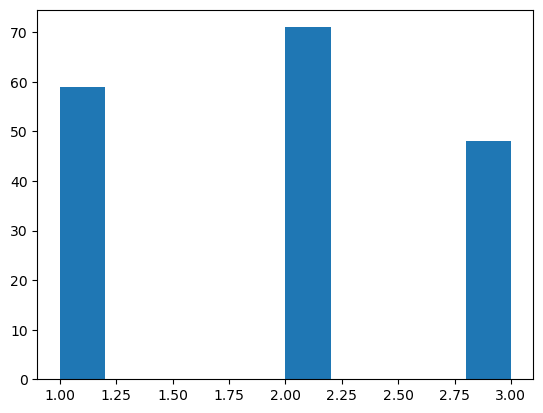

In [6]:
# Se muestran de manera gráfica el número de elementos que contiene cada variable objetiva (Tipo)

plt.hist(wine.Tipo)

In [7]:
# Se establecen los datos predictores y la variable objetiva que para este caso es la columna Tipo

predictors_col = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280_OD315','Proline']
target_col = ['Tipo']

In [8]:
# Se les asigna nombres cortos a las variables predictors_col y target_col

predictores = wine[predictors_col]
variable_objetiva = wine[target_col]

In [9]:
# Se establecen los procentajes que serán utilizados para entrenar el modelo y para llevar a cabo la prueba con el modelo

x_train, x_test, y_train, y_test = train_test_split(predictores, variable_objetiva, test_size=0.4, random_state=13)

In [10]:
# Se crea el Árbol de Decisión

tree = DecisionTreeClassifier()

In [11]:
# Se lleva a cabo el entrenamiento del modelo con el porcentaje de datos anteriormente definidos

arbol_decision = tree.fit(x_train, y_train)

[Text(0.4090909090909091, 0.9, 'x[6] <= 1.4\ngini = 0.663\nsamples = 106\nvalue = [35, 40, 31]'),
 Text(0.18181818181818182, 0.7, 'x[10] <= 0.93\ngini = 0.239\nsamples = 36\nvalue = [0, 5, 31]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.6363636363636364, 0.7, 'x[12] <= 724.5\ngini = 0.5\nsamples = 70\nvalue = [35, 35, 0]'),
 Text(0.45454545454545453, 0.5, 'x[4] <= 102.5\ngini = 0.057\nsamples = 34\nvalue = [1, 33, 0]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.5454545454545454, 0.3, 'x[0] <= 12.83\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.45454545454545453, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.6363636363636364, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.8181818181818182, 0.5, 'x[9] <= 3.435\ngini = 0.105\nsamples = 36\nvalue = [34, 2, 0]'),
 Text(0.727272727272

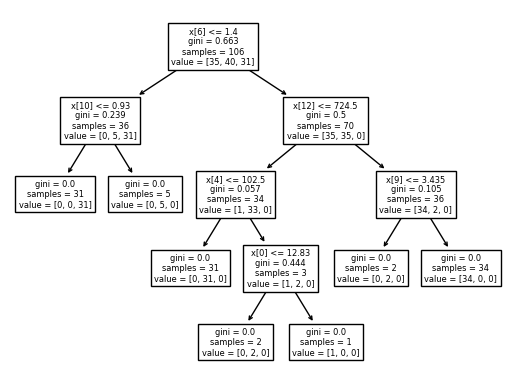

In [12]:
# Se gráfica el Árbol de Decisión del entrenamiento del modelo

plot_tree(arbol_decision)

In [13]:
# El modelo realiza la predicción de la información con el porcentaje de datos definidos 

predicciones = arbol_decision.predict(x_test)

In [14]:
# Se muestra la matriz de confusión para evaluar el modelo

pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,1,2,3
Actual,,,
1,24,0,0
2,0,29,2
3,1,1,15


In [15]:
# Se realiza la comparación entre los valores reales y las predicciones que el modelo realizo

accuracy = accuracy_score(y_test, predicciones)
accuracy

0.9444444444444444